# 多层感知机

我们已经介绍了包括线性回归和 Softmax 回归在内的单层神经网络。本节中，我们将以多层感知机（multilayer perceptron，简称 MLP）为例，介绍多层神经网络的概念。

多层感知机是最基础的深度学习模型。


## 隐藏层

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。图 3.3 展示了一个多层感知机的神经网络图。

![ 带有隐藏层的多层感知机。它含有一个隐藏层，该层中有 5 个隐藏单元。](../img/mlp.svg)

在图 3.3 的多层感知机中，输入和输出个数分别为 4 和 3，中间的隐藏层中包含了 5 个隐藏单元（hidden unit）。由于输入层不涉及计算，图 3.3 中的多层感知机的层数为 2。由图 3.3 可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。


## 仿射变换

在描述隐藏层的计算之前，让我们看看多层感知机输出层是怎样计算的。它的计算和之前介绍的单层神经网络的输出层的计算类似：只是输出层的输入变成了隐藏层的输出。我们通常将隐藏层的输出称为隐藏层变量或隐藏变量。

给定一个小批量样本，其批量大小为 $n$，输入个数为 $d$，输出个数为 $q$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为 $h$，隐藏变量 $\boldsymbol{H} \in \mathbb{R}^{n \times h}$。假设输出层的权重和偏差参数分别为 $\boldsymbol{W}_o \in \mathbb{R}^{h \times q}, \boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$，多层感知机输出

$$
\boldsymbol{O} = \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
$$

其中的加法运算使用了广播机制，$\boldsymbol{O}  \in \mathbb{R}^{n \times q}$。实际上，多层感知机的输出 $\boldsymbol{O}$ 是对上一层的输出 $\boldsymbol{H}$ 的仿射变换（affine transformation）。它包括一次通过乘以权重参数的线性变换和一次通过加上偏差参数的平移。


那么，如果隐藏层也只对输入做仿射变换会怎么样呢？设单个样本的特征为 $\boldsymbol{x} \in \mathbb{R}^{1 \times d}$，隐藏层的权重参数和偏差参数分别为 $\boldsymbol{W}_h \in \mathbb{R}^{d \times h}, \boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$。
假设 $\boldsymbol{h} = \boldsymbol{x} \boldsymbol{W}_h + \boldsymbol{b}_h$ 且 $\boldsymbol{o} = \boldsymbol{h} \boldsymbol{W}_o + \boldsymbol{b}_o$，联立两式可得 $\boldsymbol{o} = \boldsymbol{x} \boldsymbol{W}_h \boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$：它等价于单层神经网络的输出 $\boldsymbol{o} = \boldsymbol{x} \boldsymbol{W}' + \boldsymbol{b}'$，其中 $\boldsymbol{W}' = \boldsymbol{W}_h \boldsymbol{W}_o, \boldsymbol{b}' = \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。因此，在隐藏层中仅使用仿射变换的多层感知机与前面介绍的单层神经网络没什么区别。

## 激活函数

通过上面的例子，我们发现：必须在隐藏层中使用其他变换，例如添加非线性变换，才能使多层感知机变得有意义。我们将这些非线性变换称为激活函数（activation function）。激活函数能对任意形状的输入都按元素操作且不改变输入的形状。以下列举三种常用的激活函数。

### ReLU 函数

ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素 $x$，该函数定义为

$$\text{relu}(x) = \max(x, 0).$$

可以看出，ReLU 函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数 `xyplot`。

In [1]:
import sys
sys.path.append('..')
import gluonbook as gb
from mxnet import nd

def xyplot(x_vals, y_vals, x_label, y_label):
    %config InlineBackend.figure_format = 'retina'
    gb.plt.rcParams['figure.figsize'] = (3.5, 2.5)
    gb.plt.plot(x_vals,y_vals)
    gb.plt.xlabel(x_label)
    gb.plt.ylabel(y_label)
    gb.plt.show()

我们接下来绘制 ReLU 函数。当元素值非负时，ReLU 函数实际上在做线性变换。

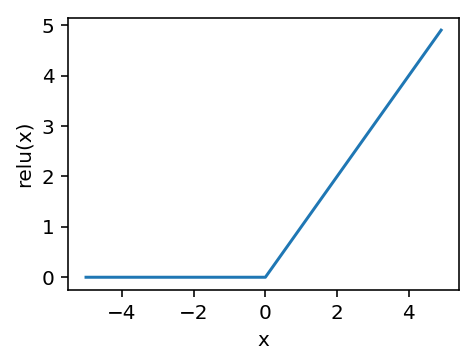

In [2]:
x = nd.arange(-5.0, 5.0, 0.1)
xyplot(x.asnumpy(), x.relu().asnumpy(), 'x', 'relu(x)')

### Sigmoid 函数

Sigmoid 函数可以将元素的值变换到 0 和 1 之间：

$$\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

我们会在后面“循环神经网络”一章中介绍如何利用 sigmoid 函数值域在 0 到 1 之间这一特性来控制信息在神经网络中的流动。

下面绘制了 sigmoid 函数。当元素值接近 0 时，sigmoid 函数接近线性变换。

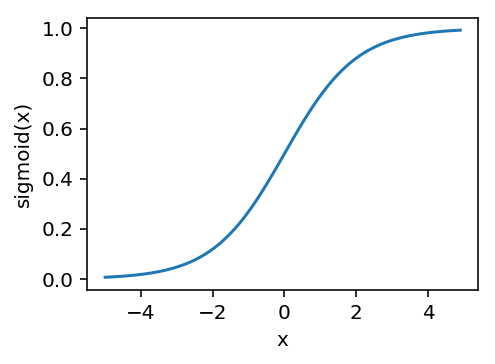

In [3]:
xyplot(x.asnumpy(), x.sigmoid().asnumpy(), 'x', 'sigmoid(x)')

### Tanh 函数

Tanh（双曲正切）函数可以将元素的值变换到 -1 和 1 之间：

$$\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

我们接着绘制 tanh 函数。当元素值接近 0 时，tanh 函数接近线性变换。值得一提的是，它的形状和 sigmoid 函数很像，且当元素在实数域上均匀分布时，tanh 函数值的均值为 0。

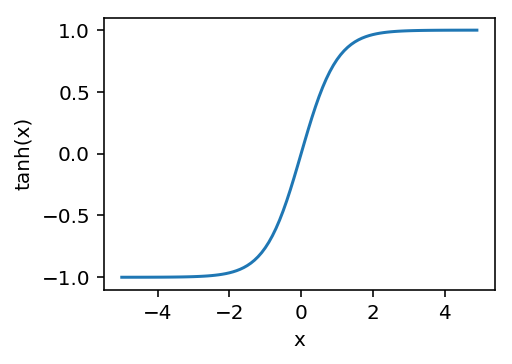

In [4]:
xyplot(x.asnumpy(), x.tanh().asnumpy(), 'x', 'tanh(x)')

然后，我们使用三种激活函数来变换输入。按元素操作后，输入和输出形状相同。

In [5]:
X = nd.array([[[0,1], [-2,3], [4,-5]], [[6,-7], [8,-9], [10,-11]]])
X.relu(), X.sigmoid(), X.tanh()

(
 [[[  0.   1.]
   [  0.   3.]
   [  4.   0.]]
 
  [[  6.   0.]
   [  8.   0.]
   [ 10.   0.]]]
 <NDArray 2x3x2 @cpu(0)>, 
 [[[  5.00000000e-01   7.31058598e-01]
   [  1.19202919e-01   9.52574134e-01]
   [  9.82013762e-01   6.69285096e-03]]
 
  [[  9.97527421e-01   9.11051175e-04]
   [  9.99664664e-01   1.23394580e-04]
   [  9.99954581e-01   1.67014223e-05]]]
 <NDArray 2x3x2 @cpu(0)>, 
 [[[ 0.          0.76159418]
   [-0.96402758  0.99505478]
   [ 0.99932933 -0.99990922]]
 
  [[ 0.99998772 -0.99999833]
   [ 0.99999976 -0.99999994]
   [ 1.         -1.        ]]]
 <NDArray 2x3x2 @cpu(0)>)

## 多层感知机

现在，我们可以给出多层感知机的矢量计算表达式了。

给定一个小批量样本 $\boldsymbol{X} \in \mathbb{R}^{n \times d}$，其批量大小为 $n$，输入个数为 $d$，输出个数为 $q$。
假设多层感知机只有一个隐藏层，其中隐藏单元个数为 $h$，激活函数为 $\phi$。假设隐藏层的权重和偏差参数分别为 $\boldsymbol{W}_h \in \mathbb{R}^{d \times h}, \boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$，
输出层的权重和偏差参数分别为 $\boldsymbol{W}_o \in \mathbb{R}^{h \times q}, \boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$。
多层感知机的矢量计算表达式为

$$
\boldsymbol{H} = \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\
\boldsymbol{O} = \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
$$

其中的加法运算使用了广播机制，$\boldsymbol{H} \in \mathbb{R}^{n \times h}, \boldsymbol{O}  \in \mathbb{R}^{n \times q}$。
在分类问题中，我们可以对输出 $\boldsymbol{O}$ 做 Softmax 运算，并使用 Softmax 回归中的交叉熵损失函数。
在回归问题中，我们将输出层的输出个数设为 1，并将输出 $\boldsymbol{O}$ 直接提供给线性回归中使用的平方损失函数。

我们可以添加更多的隐藏层来构造更深的模型。需要指出的是，多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。


## 计算梯度

有了多层感知机的损失函数后，优化算法将迭代模型参数从而不断降低损失函数的值。我们在前面章节里用了小批量随机梯度下降，和大多数其他优化算法一样，它需要计算损失函数有关模型参数的梯度。我们可以把数学上对复合函数求梯度的链式法则应用于多层感知机的梯度计算。我们将在后面章节详细介绍深度学习模型中的梯度计算，例如多层感知机的反向传播。


## 衰减和爆炸

需要注意的是，当深度学习模型的层数较多时，模型的数值稳定性容易变差。假设一个层数为 $L$ 的多层感知机的第 $l$ 层 $\boldsymbol{H}^{(l)}$ 的权重参数为 $\boldsymbol{W}^{(l)}$，输出层 $\boldsymbol{H}^{(L)}$ 的权重参数为 $\boldsymbol{W}^{(L)}$。为了便于讨论，我们也假设不考虑偏差参数，且所有隐藏层的激活函数为 $\phi(x) = x$。给定输入 $\boldsymbol{X}$，多层感知机的第 $l$ 层的输出 $\boldsymbol{H}^{(l)} = \boldsymbol{X} \boldsymbol{W}^{(1)} \boldsymbol{W}^{(2)} \ldots \boldsymbol{W}^{(l)}$。此时，如果层数 $l$ 较大，$\boldsymbol{H}^{(l)}$ 的计算可能会出现衰减（vanishing）或爆炸（explosion）。举个例子，假如输入和所有层的权重参数都是标量的话，比如 0.5 和 2，多层感知机的第 50 层输出在输入前的系数分别为 $0.5^{50}$（衰减）和 $2^{50}$（爆炸）。类似地，当层数较多时，梯度的计算也更容易出现衰减或爆炸。我们会在后面章节介绍梯度的衰减或爆炸，例如循环神经网络的通过时间反向传播。


## 随机初始化模型参数

在神经网络中，我们需要随机初始化模型参数。下面我们来解释这一点。

以图 3.3 为例，假设输出层只保留一个输出单元 $o_1$（删去 $o_2, o_3$ 和指向它们的箭头），且隐藏层使用相同的激活函数。如果初始化后每个隐藏单元的参数都相同，那么在模型训练时每个隐藏单元将根据相同输入计算出相同的值。接下来输出层也将从各个隐藏单元拿到完全一样的值。在迭代每个隐藏单元的参数时，这些参数在每轮迭代的值都相同。那么，由于每个隐藏单元拥有相同激活函数和相同参数，所有隐藏单元将继续根据下一次迭代时的相同输入计算出相同的值。如此周而复始。这种情况下，无论隐藏单元个数有多大，隐藏层本质上只有 1 个隐藏单元在发挥作用。因此，我们通常会随机初始化神经网络的模型参数，例如每个神经元的权重参数。


### MXNet 的默认随机初始化

随机初始化模型参数的方法有很多。在 [“线性回归的 Gluon 实现”](linear-regression-gluon.md) 一节中，我们使用 `net.initialize(init.Normal(sigma=0.01))` 使模型 `net` 的权重参数采用正态分布的随机初始化方式。如果不指定初始化方法，例如 `net.initialize()`，我们将使用 MXNet 的默认随机初始化方法。默认的随机初始化中，权重参数每个元素随机采样于 -0.07 到 0.07 之间的均匀分布，偏差参数全部清零。


### Xavier 随机初始化

还有一种比较常用的随机初始化方法叫做 Xavier 随机初始化 [1]。假设某全连接层的输入个数为 $a$，输出个数为 $b$，Xavier 随机初始化将使得该层中权重参数的每个元素都随机采样于均匀分布

$$U\left(-\sqrt{\frac{6}{a+b}}, \sqrt{\frac{6}{a+b}}\right).$$

它的设计主要考虑到，模型参数初始化后，每层输出的方差不该被该层输入个数所影响，且每层梯度的方差不该被该层输出个数所影响。这两点与我们之后将要介绍的正向传播和反向传播有关。


## 小结

* 多层感知机对输入做了一系列的线性和非线性的变换。
* 常用的激活函数包括 ReLU 函数、sigmoid 函数和 tanh 函数。
* 我们需要随机初始化神经网络的模型参数。


## 练习

* 有人说随机初始化模型参数是为了“打破对称性”。这里的“对称”应如何理解？

## 扫码直达 [ 讨论区 ](https://discuss.gluon.ai/t/topic/6447)

![](../img/qr_mlp.svg)

## 参考文献

[1] Glorot, X., & Bengio, Y. (2010, March). Understanding the difficulty of training deep feedforward neural networks. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).